#### Dataset Iris

In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)

In [2]:
X = X.loc[y.isin([0,1]), ['petal length (cm)', 'petal width (cm)']]
y = y[y.isin([0,1])]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Gráfico dos dados

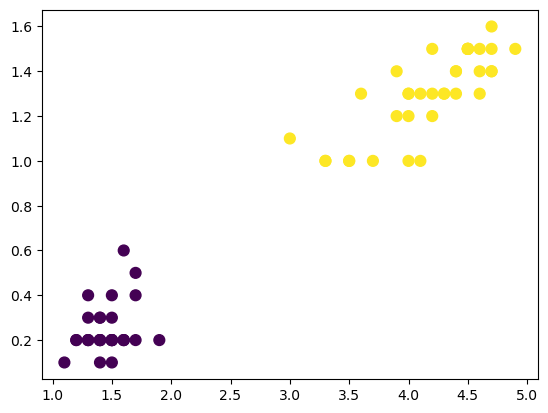

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(
    X_train['petal length (cm)'],
    X_train['petal width (cm)'],
    c=y_train,
    s=60
)

plt.show()

#### SVM

In [5]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(X_train, y_train)

In [6]:
w1, w2, w0 = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

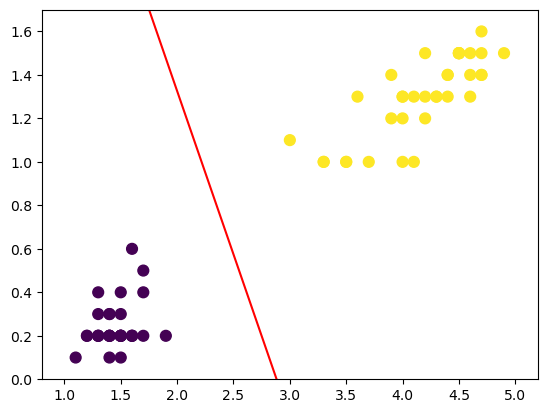

In [7]:
fig, ax = plt.subplots()

ax.scatter(
    X_train['petal length (cm)'],
    X_train['petal width (cm)'],
    c=y_train,
    s=60
)

x_axis = np.linspace(1,5,100)
y_axis = (-w1 * x_axis - w0) / w2

ax.plot(x_axis, y_axis, 'r')

ax.set(ylim=(0, 1.7))

plt.show()

In [8]:
x_coords = clf.support_vectors_[:,0]
y_coords = clf.support_vectors_[:,1]

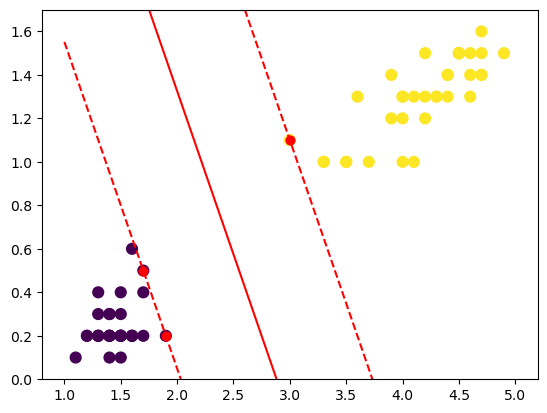

In [9]:
fig, ax = plt.subplots()

ax.scatter(
    X_train['petal length (cm)'],
    X_train['petal width (cm)'],
    c=y_train,
    s=60
)

y_axis2 = (1-w1 * x_axis - w0) / w2
y_axis3 = (-1-w1 * x_axis - w0) / w2

ax.plot(x_axis, y_axis, 'r')
ax.scatter(x_coords, y_coords, c='r')
ax.plot(x_axis, y_axis2, '--r')
ax.scatter(x_coords, y_coords, c='r')
ax.plot(x_axis, y_axis3, '--r')

ax.set(ylim=(0, 1.7))

plt.show()

#### SVM com todos os dados

In [10]:
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
clf2 = SVC().fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [12]:
names = load_iris().target_names

#### Métricas do modelo com todos os dados

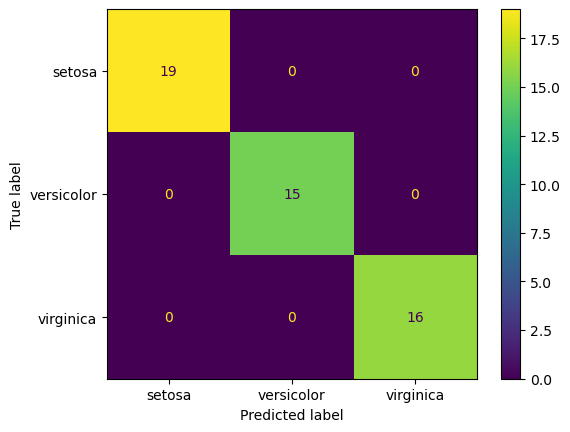

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=names).plot();

In [14]:
accuracy_score(y_test, y_pred) * 100

100.0

In [15]:
precision_score(y_test, y_pred, average='macro') * 100

100.0

In [16]:
recall_score(y_test, y_pred, average='macro') * 100

100.0